# **Importing libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns


from plotly.offline import init_notebook_mode, plot
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import geopandas as gpd

# **Reading and storing data**

In [2]:
data = pd.read_csv('../input/suicides-in-india/Suicides in India 2001-2012.csv')
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


# Check shape of the data

In [3]:
data.shape

(237519, 7)

# **Fetch all the unique values under column 'State'**

In [4]:
data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

# **Remove unnecessary rows from the data**

In [5]:
frame = data[data['State'] != 'Total (All India)']
frame = frame[frame['State'] != 'Total (States)']
frame = frame[frame['State'] != 'Total (Uts)']
frame.shape

(236583, 7)

In [6]:
frame['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# **Analysing only the causes of suicides**

In [7]:
final_frame = frame[frame['Type_code'] == 'Causes']
final_frame.shape

(109200, 7)

# **Removing uncertain causes for suicides for better EDA**

In [8]:
final_frame_new = final_frame[final_frame['Type'] != 'Other Causes (Please Specity)']
final_frame_new.shape

(105000, 7)

In [9]:
final_frame_new = final_frame_new[final_frame_new['Type'] != 'Causes Not known']
final_frame_new = final_frame_new[final_frame_new['Type'] != 'Other Prolonged Illness']
final_frame_new = final_frame_new[final_frame_new['Type'] != 'Not having Children(Barrenness/Impotency']
final_frame_new = final_frame_new[final_frame_new['Type'] != 'Not having Children (Barrenness/Impotency']
final_frame_new.shape
data_new = pd.DataFrame(final_frame_new)
data_new.shape

(92400, 7)

# **A completely new dataframe for EDA**

In [10]:
data_new

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237217,West Bengal,2012,Causes,Suspected/Illicit Relation,Male,60+,0
237218,West Bengal,2012,Causes,Drug Abuse/Addiction,Male,60+,0
237220,West Bengal,2012,Causes,Poverty,Male,60+,0
237221,West Bengal,2012,Causes,Family Problems,Male,60+,0


# **Year-wise suicide comparison using bar graph plot**

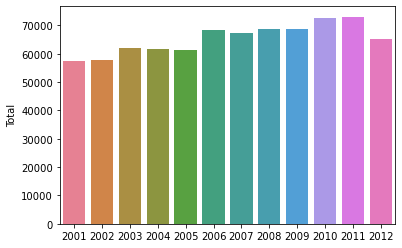

In [11]:
sns.barplot(x = data_new['Year'].unique(), y = data_new.groupby('Year').sum()['Total'], ci = None, palette = 'husl')
sns.set(rc={'figure.figsize':(30,15)})

# **Age-group wise suicide comparison using bar graph plot**

In [14]:
fig = px.bar(data_new,
    x = data_new['Age_group'].unique(),
    y = data_new.groupby('Age_group').sum()['Total'],
    color_discrete_sequence=["#516882"],
)

fig.update_layout(
    title="Age Group suicide",
    xaxis_title="Age group",
    yaxis_title="Suicide Count",
)

fig.show()

# **Gender-wise suicide comparison using grouped bar graph plot**

In [15]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x= data_new['Year'].unique(),
    y= data_new.groupby([data_new.Gender == 'Male' , 'Year']).sum()['Total'],
    name='Female',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x= data_new['Year'].unique(),
    y= data_new.groupby([data_new["Gender"] == 'Female' , 'Year']).sum()['Total'],
    name='Male',
    marker_color='lightsalmon'
))


fig.update_layout(barmode='group', xaxis_tickangle=-90)
fig.show()

# **Importing Indian states shp file and making the required changes for join**

In [16]:
india_map = gpd.read_file('../input/final-shp/Indian_States.shp')
data_new['State'].replace({'A & N Islands':'Andaman & Nicobar Island',
                        'Delhi (Ut)':'NCT of Delhi',
                        'D & N Haveli':'Dadra and Nagar Haveli',
                       }, inplace = True)

india_map['st_nm'].replace({'Telangana':'Andhra Pradesh',
                        'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli',
                       }, inplace = True)

india_map.st_nm.unique()

array(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Andhra Pradesh',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha'],
      dtype=object)

In [17]:
data_new.State.unique()

array(['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman & Diu', 'NCT of Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

# **Grouping the data for state-wise suicide count**

In [18]:
india_map.rename(columns = {'st_nm':'State'}, inplace = True)
suicide_data_states = data_new.groupby(['State']).agg({'Total':'sum'})

# **Geospatial analysis of state-wise suicides**

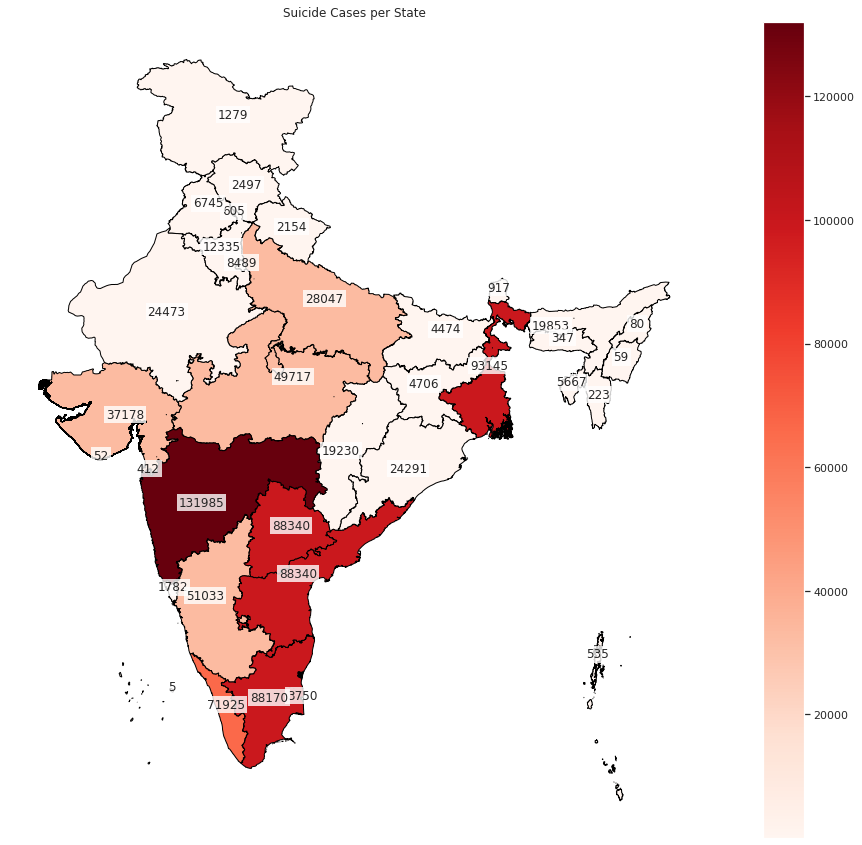

In [19]:
suicide_data_map = india_map.merge(suicide_data_states, left_on='State', right_on='State')

suicide_data_map['coords'] = suicide_data_map['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_data_map['coords'] = [coords[0] for coords in suicide_data_map['coords']]

fig, ax = plt.subplots(figsize=(22, 15))

cmap = 'Reds'

ax = suicide_data_map.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State')

for idx, row in suicide_data_map.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['Total'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_data_map['Total'].min(), vmax= suicide_data_map['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

#suicide_map[suicide_map['Total'] > 0].plot(ax=ax, cmap=cmap, markersize=1)

plt.xticks([])
plt.yticks([])
plt.show()

# **Major causes of suicides**

In [20]:
q_stats = data_new.groupby(['Type']).sum()

q_stats.Total.sort_values(ascending = False)

Type
Family Problems                                   341952
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Bankruptcy or Sudden change in Economic            32755
Poverty                                            32684
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Unemployment                                       27365
Failure in Examination                             27005
Property Dispute                                   18652
Suspected/Illicit Relation                         14911
Fall in Social Reputation                          13464
Professional/Career Problem                        12554
Cancellation/Non-Settlement of Marriage            11296
Death of Dear Person                               10321
Cancer                                              9058
Illness (Aids/STD)                                  8723
Paralysis                 

# **Geospatial analysis of state-wise suicide with *family problems* as a cause**

In [21]:
f_p = data_new[data_new['Type'] == 'Family Problems']
f_p = f_p.groupby(['Type','State']).sum()

stats_1 = f_p.drop(['Year'], axis = 1)

f_p_stats = pd.DataFrame(stats_1)

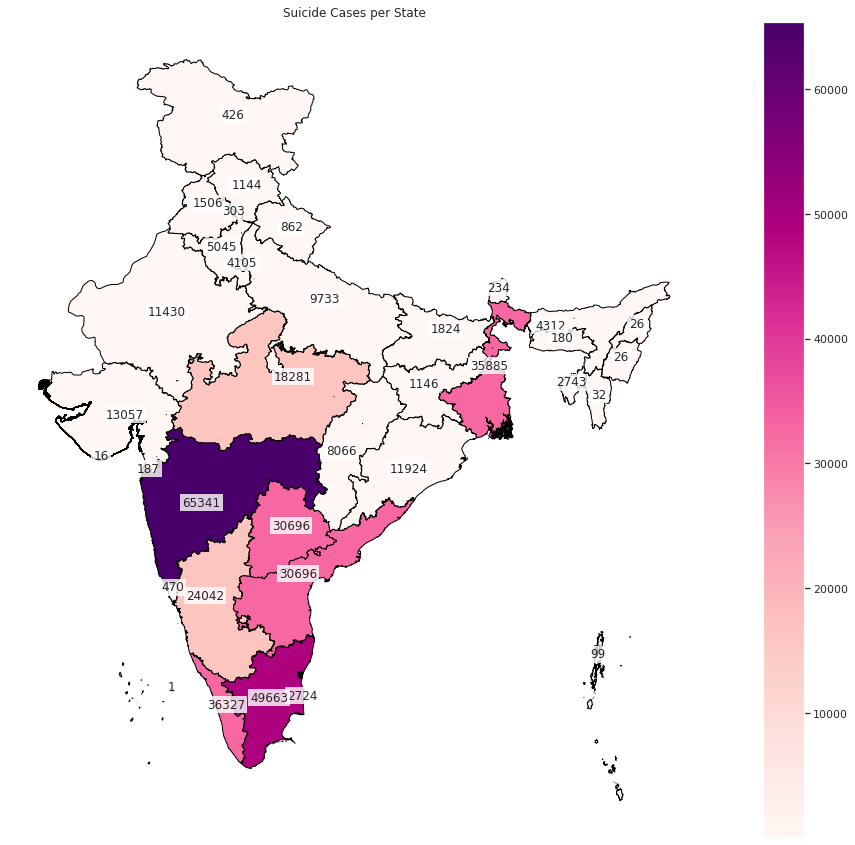

In [22]:
suicide_data_map = india_map.merge(f_p_stats, left_on='State', right_on='State')

suicide_data_map['coords'] = suicide_data_map['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_data_map['coords'] = [coords[0] for coords in suicide_data_map['coords']]

fig, ax = plt.subplots(figsize=(22, 15))

cmap = 'RdPu'

ax = suicide_data_map.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State')

for idx, row in suicide_data_map.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Total'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_data_map['Total'].min(), vmax= suicide_data_map['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

#suicide_map[suicide_map['Total'] > 0].plot(ax=ax, cmap=cmap, markersize=1)

plt.xticks([])
plt.yticks([])
plt.show()

# **Geospatial analysis of state-wise suicide with *insanity/mental illness* as a cause**

In [23]:
mi = data_new[data_new['Type'] == 'Insanity/Mental Illness']
mi = mi.groupby(['Type','State']).sum()

stats_2 = mi.drop(['Year'], axis = 1)

mi_stats = pd.DataFrame(stats_2)

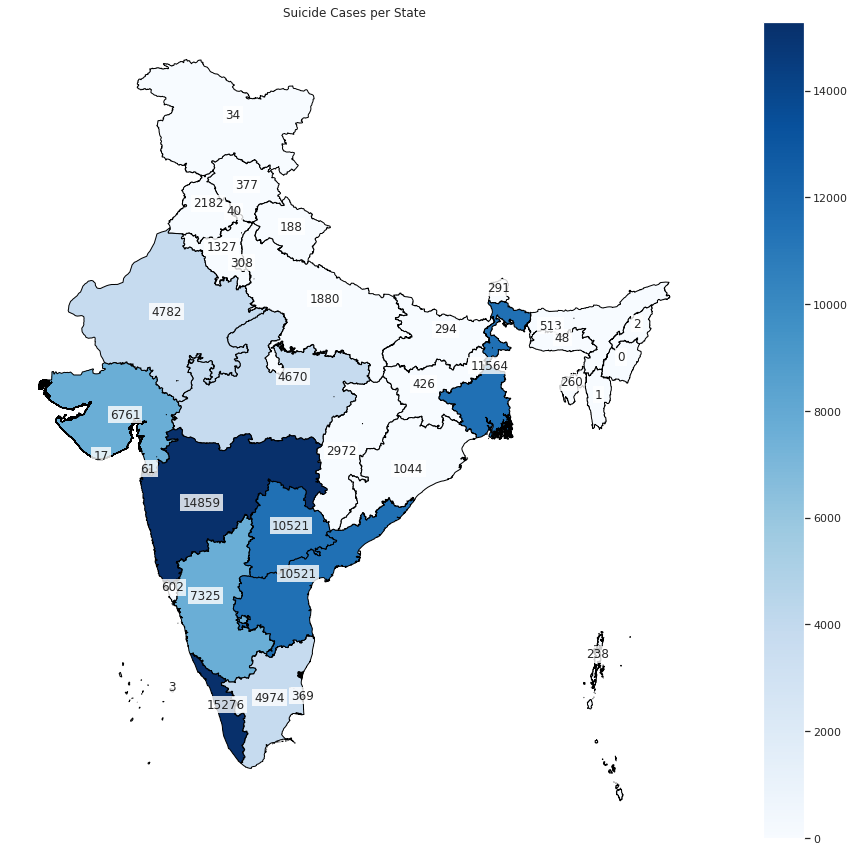

In [24]:
suicide_data_map = india_map.merge(mi_stats, left_on='State', right_on='State')

suicide_data_map['coords'] = suicide_data_map['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_data_map['coords'] = [coords[0] for coords in suicide_data_map['coords']]

fig, ax = plt.subplots(figsize=(22, 15))

cmap = 'Blues'

ax = suicide_data_map.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State')

for idx, row in suicide_data_map.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Total'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_data_map['Total'].min(), vmax= suicide_data_map['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

#suicide_map[suicide_map['Total'] > 0].plot(ax=ax, cmap=cmap, markersize=1)

plt.xticks([])
plt.yticks([])
plt.show()

# **Geospatial analysis of state-wise suicide with *love affairs* as a cause**

In [25]:
love = data_new[data_new['Type'] == 'Love Affairs']
love = love.groupby(['Type','State']).sum()

stats_3 = mi.drop(['Year'], axis = 1)

love_stats = pd.DataFrame(stats_3)

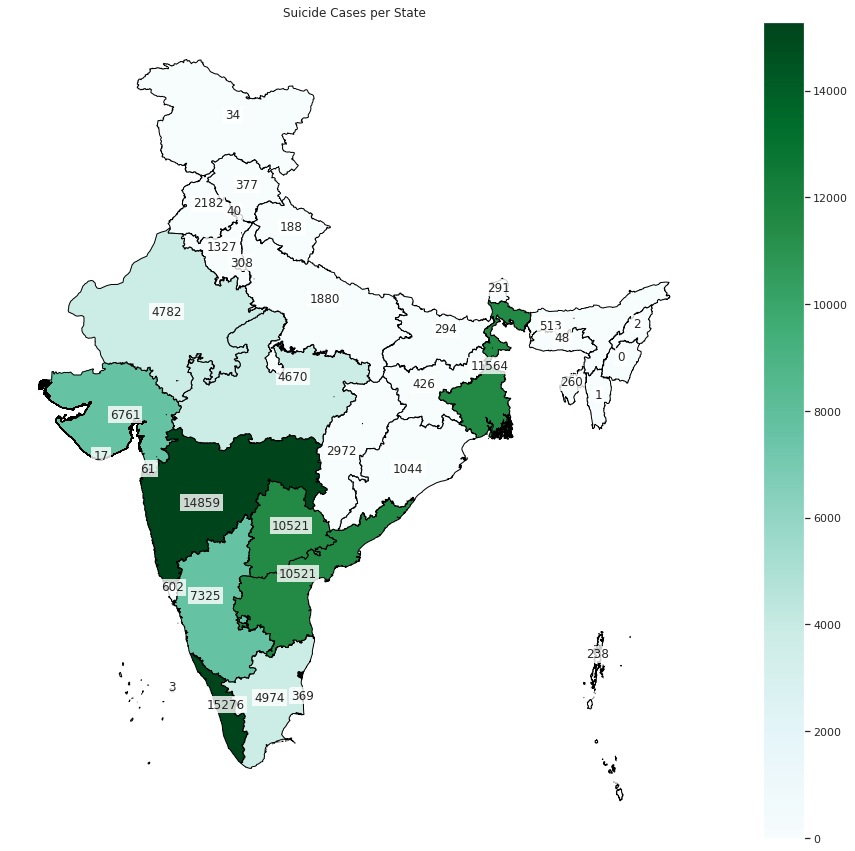

In [26]:
suicide_data_map = india_map.merge(love_stats, left_on='State', right_on='State')

suicide_data_map['coords'] = suicide_data_map['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_data_map['coords'] = [coords[0] for coords in suicide_data_map['coords']]

fig, ax = plt.subplots(figsize=(22, 15))

cmap = 'BuGn'

ax = suicide_data_map.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State')

for idx, row in suicide_data_map.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Total'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_data_map['Total'].min(), vmax= suicide_data_map['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

#suicide_map[suicide_map['Total'] > 0].plot(ax=ax, cmap=cmap, markersize=1)

plt.xticks([])
plt.yticks([])
plt.show()